# Step 1: Importing Libraries

In [131]:
# Data analysis tools
import pandas as pd
import numpy as np

# Data Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt

# Data Pre-Processing Libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
#import category_encoders as ce

# For Train-Test Split
from sklearn.model_selection import train_test_split

# Libraries for various Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics Tools
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

#For Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_curve ,roc_auc_score, auc

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Step 2: Loading the Dataset

In [132]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Step 3: Understanding the Structure of the Dataset

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Step 4: Data Pre-Processing

   # a) Treating Missing Values

In [134]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<b> No Missing Values in the dataset. Hence no treatment for missing values required</b>


# b) Finding and removing all the duplicated values

In [135]:
len(df[df.duplicated()])

0

<b> The dataset does not have any duplicate values.</b>

# c) Checking for Imbalance

<b>From the graph, it is clear that the class distribution is Imbalanced. The dataset has 80% samples of class 0 (employee is not leaving the job) and 20% samples of class 1(employee has decided to leave the job).</b>

C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Checking imbalance')

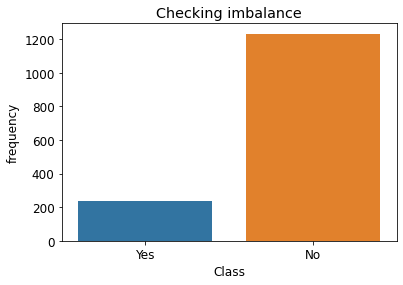

In [136]:
sns.countplot(df["Attrition"])
plt.xlabel("Class")
plt.ylabel("frequency")
plt.title("Checking imbalance")

# Step 6: Defining the Tatget and Predictor Variables and Standard Scaling

<b> If a feature’s variance is more than the variance of other features, that particular feature might dominate other features in the dataset. This could affect the accuracy of predictions. Hence, we need to scale all the features to a standard centred scale. For this purpose, we use StandardScaler() method.</b>

In [137]:
X=df.drop('Attrition',axis=1)

In [138]:
em = pd.get_dummies(X)

In [139]:
em.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [140]:
df['Attrition']=LabelEncoder().fit_transform(df['Attrition'])
y=df['Attrition']

In [141]:
x_train, x_test, y_train, y_test = train_test_split(em,y, test_size=0.30, random_state=0)

# Step 7: Fitting the dataset to various models

<b>We will fit the dataset to various models and find out the best fit model among these.

Various models used in this notebook are:
    

1)  Logistic Regression

2)  KNN                

3)  Naive-Bayes       

4)  SVM                   

5)  Decision Tree         

6)  Gradient Boosting     

7)  Random Forest         

8)  AdaBoost             

9)  XGBoost    </b>           

# 1) Logistic Regression

In [142]:
#Fitting the model

logistic_Regression = LogisticRegression(max_iter=3000,random_state=0,class_weight="balanced",solver = "saga")
logistic_Regression.fit(x_train,y_train)

C:\Users\dines\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(class_weight='balanced', max_iter=3000, random_state=0,
                   solver='saga')

In [143]:
# Applying the model to the x_test

y_pred = logistic_Regression.predict(x_test)

In [144]:
# Finding Accuracy

log = accuracy_score(y_test, y_pred)*100

In [145]:
# Confusion Matrix

cmlr=confusion_matrix(y_test)
print(cmlr)

TypeError: confusion_matrix() missing 1 required positional argument: 'y_pred'

In [ ]:
# Classification Report that computes various
# metrics like Precision, Recall and F1 Score

print(classification_report(y_pred,y_test))

In [ ]:
# Plotting the ROC Curve


prob_lr=logistic_Regression.predict_proba(x_test)
auc_lr = roc_auc_score(y_test,prob_lr[:,1])
fprlr,tprlr,_ = roc_curve(y_test,prob_lr[:,1])
roc_auc=auc(fprlr,tprlr)
plt.plot(fprlr,tprlr,label = "AUC = %.2f" % auc_lr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 2) KNN

In [ ]:
#Fitting the model

knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train,y_train)

In [ ]:
# Applying the model to the x_test

pred_knn = knn.predict(x_test)

In [ ]:
# Finding Accuracy

KNN = accuracy_score(y_test, pred_knn)*100

In [ ]:
# Confusion Matrix

cm_knn=confusion_matrix(y_test, pred_knn)
print(cm_knn)

In [ ]:
# Classification Report that computes various
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test, pred_knn))

In [ ]:
# Plotting the ROC Curve

prob_knn= knn.predict_proba(x_test)
auc_knn = roc_auc_score(y_test,prob_knn[:,1])
fprknn,tprknn,_= roc_curve(y_test,prob_knn[:,1])
roc_auc_knn=auc(fprknn,tprknn)
plt.plot(fprknn,tprknn,label = "AUC = %.2f" % auc_knn)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 3) Naive-Bayes

In [ ]:
#Fitting the model

gnb=GaussianNB()
gnb.fit(x_train,y_train)

In [ ]:
# Applying the model to the x_test

pred_gnb = gnb.predict(x_test)

In [ ]:
# Finding Accuracy

GNB = accuracy_score(y_test, pred_gnb)*100

In [ ]:
# Confusion Matrix

cm_gnb=confusion_matrix(y_test, pred_gnb)
print(cm_gnb)

In [ ]:
# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test, pred_gnb))

In [ ]:
# Plotting the ROC Curve

prob_gnb= gnb.predict_proba(x_test)
auc_gnb = roc_auc_score(y_test,prob_gnb[:,1])
fprgnb,tprgnb,_= roc_curve(y_test,prob_gnb[:,1])
roc_auc_gnb=auc(fprgnb,tprgnb)
plt.plot(fprgnb,tprgnb,label = "AUC = %.2f" % auc_gnb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive-Bayes")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 4) SVM

In [ ]:
#Fitting the model

svc = SVC(probability=True)
svc.fit(x_train,y_train)

# Applying the model to the x_test
pred_svc = svc.predict(x_test)

In [ ]:
# Finding Accuracy

SVC = accuracy_score(y_test, pred_svc)*100

In [ ]:
# Confusion Matrix

cm_svc=confusion_matrix(y_test, pred_svc)
print(cm_svc)

In [ ]:
# Classification Report that computes various 
#metrics like Precision, Recall and F1 Score

print(classification_report(y_test, pred_svc))

In [ ]:
# Plotting the ROC Curve

prob_svc= svc.predict_proba(x_test)
auc_svc = roc_auc_score(y_test,prob_svc[:,1])
fprsvc,tprsvc,_= roc_curve(y_test,prob_svc[:,1])
roc_auc_svc=auc(fprsvc,tprsvc)
plt.plot(fprsvc,tprsvc,label = "AUC = %.2f" % auc_svc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 5) Decision Tree

In [ ]:
#Fitting the model

dtree_en = DecisionTreeClassifier()
clf = dtree_en.fit(x_train,y_train)

In [ ]:
# Applying the model to the x_test

pred_dt = clf.predict(x_test)

In [ ]:
# Finding Accuracy

DTREE = accuracy_score(y_test, pred_dt)*100

In [ ]:
# Confusion Matrix

cm_dt=confusion_matrix(pred_dt, y_test)
print(cm_dt)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test,pred_dt))

In [ ]:
# Plotting the ROC Curve

prob_dt= dtree_en.predict_proba(x_test)
auc_dt = roc_auc_score(y_test,prob_dt[:,1])
fprdt,tprdt,_= roc_curve(y_test,prob_dt[:,1])
roc_auc_dt=auc(fprdt,tprdt)
plt.plot(fprdt,tprdt,label = "AUC = %.2f" % auc_dt)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 6) Gradient Boosting

In [ ]:
#Fitting the model

GBC=GradientBoostingClassifier(n_estimators=150)
GBC.fit(x_train,y_train)

In [146]:
# Applying the model to the x_test

Y_predict=GBC.predict(x_test)

In [147]:
# Finding Accuracy

gbc = accuracy_score(y_test,Y_predict)*100

In [148]:
# Confusion Matrix

cm_gbc=confusion_matrix(y_test,Y_predict)
print(cm_gbc)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test,Y_predict))

[[362   9]
 [ 47  23]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       371
           1       0.72      0.33      0.45        70

    accuracy                           0.87       441
   macro avg       0.80      0.65      0.69       441
weighted avg       0.86      0.87      0.85       441



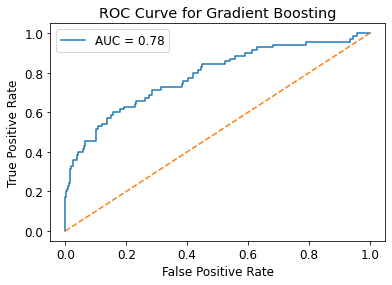

In [149]:
# Plotting the ROC Curve

prob_GBC= GBC.predict_proba(x_test)
auc_GBC = roc_auc_score(y_test,prob_GBC[:,1])
fprGBC,tprGBC,_= roc_curve(y_test,prob_GBC[:,1])
roc_auc_GBC=auc(fprGBC,tprGBC)
plt.plot(fprGBC,tprGBC,label = "AUC = %.2f" % auc_GBC)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 7) Random Forest

In [150]:
#Fitting the model

rfc = RandomForestClassifier(n_estimators=30,criterion='gini',random_state=1,max_depth=10)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=1)

In [151]:
# Applying the model to the x_test

pred_rf= rfc.predict(x_test)

In [152]:
# Finding Accuracy

RFC = accuracy_score(y_test,pred_rf)*100

In [153]:
# Confusion Matrix

cm_rf=confusion_matrix(y_test, pred_rf)
print(cm_rf)

[[369   2]
 [ 56  14]]


In [154]:
# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       371
           1       0.88      0.20      0.33        70

    accuracy                           0.87       441
   macro avg       0.87      0.60      0.63       441
weighted avg       0.87      0.87      0.83       441



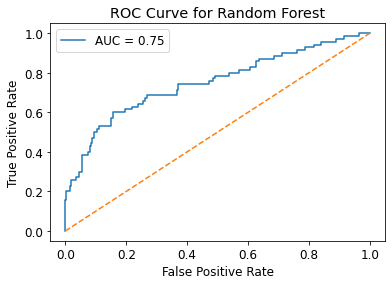

In [155]:
# Plotting the ROC Curve

prob_rfc= rfc.predict_proba(x_test)
auc_rfc = roc_auc_score(y_test,prob_rfc[:,1])
fprrfc,tprrfc,_= roc_curve(y_test,prob_rfc[:,1])
roc_auc_rfc=auc(fprrfc,tprrfc)
plt.plot(fprrfc,tprrfc,label = "AUC = %.2f" % auc_rfc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 8) AdaBoost (Entropy-Decision Tree)

In [156]:
#Fitting the model. Base model is chosen to be Decision Tree

model = DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=0)
adaboost = AdaBoostClassifier(n_estimators=80, base_estimator=model,random_state=0)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1,
                                                         random_state=0),
                   n_estimators=80, random_state=0)

In [157]:
# Applying the model to the x_test

pred = adaboost.predict(x_test)

In [158]:
# Finding Accuracy

ada = accuracy_score(y_test,pred)*100

In [159]:
# Confusion Matrix

cm_ada=confusion_matrix(y_test,pred)
print(cm_ada)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test,pred))

[[356  15]
 [ 44  26]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       371
           1       0.63      0.37      0.47        70

    accuracy                           0.87       441
   macro avg       0.76      0.67      0.70       441
weighted avg       0.85      0.87      0.85       441



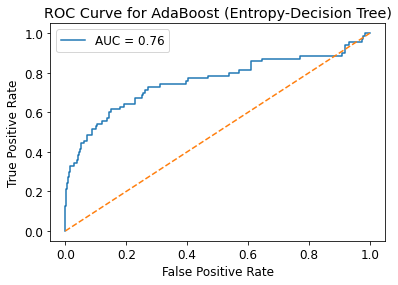

In [160]:
# Plotting the ROC Curve

prob_adaboost= adaboost.predict_proba(x_test)
auc_adaboost = roc_auc_score(y_test,prob_adaboost[:,1])
fpradaboost,tpradaboost,_= roc_curve(y_test,prob_adaboost[:,1])
roc_auc_adaboost=auc(fpradaboost,tpradaboost)
plt.plot(fpradaboost,tpradaboost,label = "AUC = %.2f" % auc_adaboost)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for AdaBoost (Entropy-Decision Tree)")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 9) XGBoost 

In [161]:
#Fitting the model

xgb =  XGBClassifier(learning_rate =0.000001,n_estimators=1000,max_depth=5,min_child_weight=1,
                     subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27)
xgb.fit(x_train, y_train)

C:\Users\dines\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1e-06, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [162]:
# Applying the model to the x_test


predxg = xgb.predict(x_test)

# Finding Accuracy
xg = accuracy_score(y_test,predxg)*100


In [163]:
# Confusion Matrix

cm_xg=confusion_matrix(y_test, predxg)
print(cm_xg)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test, predxg))

[[365   6]
 [ 54  16]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       371
           1       0.73      0.23      0.35        70

    accuracy                           0.86       441
   macro avg       0.80      0.61      0.64       441
weighted avg       0.85      0.86      0.83       441



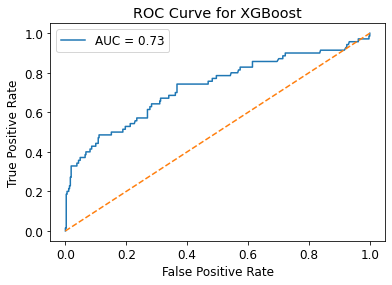

In [164]:
# Plotting the ROC Curve

prob_xgb= xgb.predict_proba(x_test)
auc_xgb = roc_auc_score(y_test,prob_xgb[:,1])
fprxgb,tprxgb,_= roc_curve(y_test,prob_xgb[:,1])
roc_auc_xgb=auc(fprxgb,tprxgb)
plt.plot(fprxgb,tprxgb,label = "AUC = %.2f" % auc_xgb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# Step 8: Choosing the Best model

There are various ways to evaluate a classification model. Some of them are:
 
1) Accuracy
    
2) AUC
    
3) ROC
    
4) f1 Score


I am evaluating with all these metrics in order to find the best fit model

# Confusion Matrix

A confusion matrix is an N X N matrix, where N is the number of classes being predicted. Confusion Matrix gives us a matrix as output and describes the complete performance of the model.

The correct predictions falls on the diagonal line of the matrix.

4 important terms in Confusion Matrix:

<b>True Positives</b>  : We predict YES and the actual output is also YES.

<b>True Negatives</b>  : We predict NO and the actual output is NO.

<b>False Positives(Type I Error)</b> : We predict YES but the actual output is NO.

<b>False Negatives(Type II error)</b> : We predict NO but the actual output is YES.

<b>The Confusion matrix in itself is not a performance measure, but almost all of the performance metrics are based on Confusion Matrix.


# 1) Accuracy

In [165]:
# Accuracy values for all the models
print("1)  Logistic Regression    :",round(log, 2))
print("2)  KNN                    :",round(KNN, 2))
print("3)  Naive-Bayes            :",round(GNB, 2))
print("4)  SVM                    :",round(SVC, 2))
print("5)  Decision Tree          :",round(DTREE, 2))
print("6)  Gradient Boosting      :",round(gbc, 2))
print("7)  Random Forest          :",round(RFC, 2))
print("8)  AdaBoost               :",round(ada, 2))
print("9)  XGBoost                :",round(xg, 2))

1)  Logistic Regression    : 54.65
2)  KNN                    : 84.13
3)  Naive-Bayes            : 76.87


TypeError: type ABCMeta doesn't define __round__ method


Here, <b>Gradient Boosting has the highest accuracy rate.</b> But during Data visualization step, we observed that the <b>class distribution is Imbalanced</b>. The dataset has 80% samples of class 0 (the employee is not leaving their job) and 20% samples of class 1(The employee has decided to leave their job). This is the reason why most of the models are getting accuracy above 90% by simply predicting every training sample belonging to class 0. But, when we apply this model to a new test-set, then the <b>test accuracy would drop to less than 60%.</b>

<b>In this case, Accuracy metric proves to be a poor indicator of model performance. Therefore, we need to consider other metrics before deciding the best model.</b>

# 2) Area Under Curve (AUC)

In [ ]:
# Area Under the Curve(AUC) of all the models
print('Area under the curve for Logistic Regression :',round(roc_auc, 2))
print('Area under the curve for KNN                 :',round(roc_auc_knn, 2))
print('Area under the curve for Naive-Bayes         :',round(roc_auc_gnb, 2))
print('Area under the curve for SVM                 :',round(roc_auc_svc, 2))
print('Area under the curve for Decision Tree       :',round(roc_auc_dt, 2))
print('Area under the curve for Gradient Boosting   :',round(roc_auc_GBC, 2))
print('Area under the curve for Random Forest       :',round(roc_auc_rfc, 2))
print('Area under the curve for AdaBoost            :',round(roc_auc_adaboost, 2))
print('Area under the curve for XGBoost             :',round(roc_auc_xgb, 2))

The area under the curve (AUC), is an aggregated measure of performance of a binary classifier on all possible threshold values. AUC calculates the area under the ROC curve, and therefore it is between 0 and 1.<b> For any classifier, the higher the AUC of a model the better it is.


Here, <b>Gradient Boosting </b> have the highest AUC value. Hence, based on the AUC values, Gradient Boosting is the best fit model.

# 3) ROC Curve

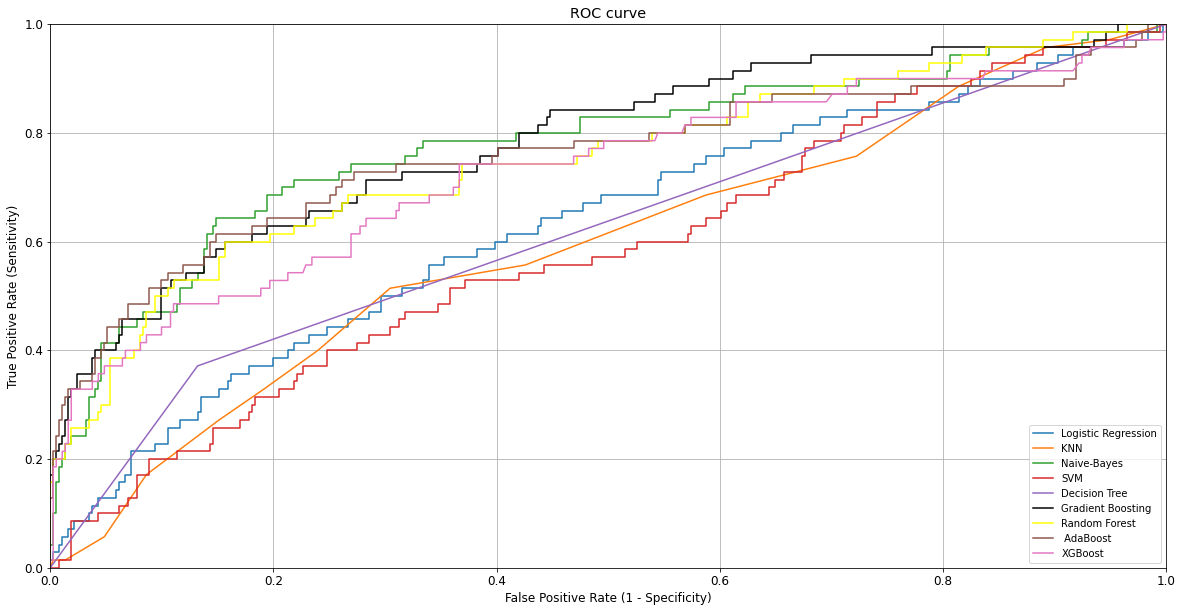

In [166]:
#ROC Curve for all models
plt.figure(figsize = (20,10))
plt.plot(fprlr,tprlr,label = "Logistic Regression")
plt.plot(fprknn,tprknn,label = "KNN")
plt.plot(fprgnb,tprgnb,label = "Naive-Bayes")
plt.plot(fprsvc,tprsvc,label = "SVM")
plt.plot(fprdt,tprdt,label = "Decision Tree")
plt.plot(fprGBC,tprGBC,label = "Gradient Boosting",color='black')
plt.plot(fprrfc,tprrfc,label = "Random Forest",color='yellow')
plt.plot(fpradaboost,tpradaboost,label = " AdaBoost")
plt.plot(fprxgb,tprxgb,label = "XGBoost")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

The <b>Receiver Operating Characteristic (ROC)</b> curve is plot which shows the performance of a binary classifier as function of its cut-off threshold. ROC curve is one of the most effective evaluation metrics because it visualizes the accuracy of predictions for a whole range of cutoff values. It essentially shows the true positive rate (TPR) against the false positive rate (FPR) for all possible threshold values. <b>A model is said to be the best model when the ROC is close to the upper left corner.</b>

Looking at the ROC curve plot above, the <b>Naive-Bayes, has the curve that is closest to the upper left corner. Hence, based on the ROC plot, Naive-Bayes is the best fit model.</b>

# 4) F1-Score

In [167]:
# f1_score of all models
print("1)  Logistic Regression    :",round(f1_score(y_pred,y_test), 2))
print("2)  KNN                    :",round(f1_score(pred_knn,y_test), 2))
print("3)  Naive-Bayes            :",round(f1_score(pred_gnb,y_test), 2))
print("4)  SVM                    :",round(f1_score(pred_svc,y_test), 2))
print("5)  Decision Tree          :",round(f1_score(pred_dt,y_test), 2))
print("6)  Gradient Boosting      :",round(f1_score(Y_predict,y_test), 2))
print("7)  Random Forest          :",round(f1_score(pred_rf,y_test), 2))
print("8)  AdaBoost               :",round(f1_score(pred,y_test), 2))
print("9)  XGBoost                :",round(f1_score(predxg,y_test), 2))

1)  Logistic Regression    : 0.32
2)  KNN                    : 0.0
3)  Naive-Bayes            : 0.49
4)  SVM                    : 0.0
5)  Decision Tree          : 0.36
6)  Gradient Boosting      : 0.45
7)  Random Forest          : 0.33
8)  AdaBoost               : 0.47
9)  XGBoost                : 0.35


<b>Precision</b>           - It is the number of True Positive divided by the number of positive results predicted by the classifier.

<b>Recall/ Sensitivity</b> - It is the number of True Positives divided by the number of all relevant samples

<b>F1 Score</b>            - F1 Score is the Harmonic Mean between precision and recall.

F1 Score tells how precise the classifier is (how many values it classifies correctly).

<b>The greater the F1 Score, the better is the performance of our model.</b>


Here, <b>Naive-Bayes</b> has the highest f1_score. Hence, based on the f1_score, Naive-Bayes is the best fit model.

# 5)Type I Error

In [168]:
#Accessing the False Positives of all models from their confusion Matrix
print("1)  Logistic Regression    :",cmlr[0][1])
print("2)  KNN                    :",cm_knn[0][1])
print("3)  Naive-Bayes            :",cm_gnb[0][1])
print("4)  SVM                    :",cm_svc[0][1])
print("5)  Decision Tree          :",cm_dt[0][1])
print("6)  Gradient Boosting      :",cm_gbc[0][1])
print("7)  Random Forest          :",cm_rf[0][1])
print("8)  AdaBoost               :",cm_ada[0][1])
print("9)  XGBoost                :",cm_xg[0][1])

1)  Logistic Regression    : 23
2)  KNN                    : 70
3)  Naive-Bayes            : 21
4)  SVM                    : 70
5)  Decision Tree          : 49
6)  Gradient Boosting      : 9
7)  Random Forest          : 2
8)  AdaBoost               : 15
9)  XGBoost                : 6


False Positives(Type I Error) occurs when we incorrectly reject a true hypothesis.<b>Lower the value of False Positives, better is the model</b>. This is because, while predicting, <b>if we predict that an employee is not going to leave the job, but later he/she actually leaves the job, then this kind of wrong prediction could further increase Attrition Rate to an alarming range.</b>

The False Positives(Type I Error) for all the models can be accessed from the confusion matrix.


<b>Gradient Boosting algorithm has the least number of False Positives(Type I Error). Hence, based on the False Positives(Type I Error), Gradient Boosting is the best fit model.</b>

# Step 9: Finalizing the Best Model

After all the comparison using 5 different metrics:

when considering the metrics AUC, ROC and Type I error, Gradient Boosting is found to be the best model.

when considering the metrics Accuracy and F1 Score, Random Forest is found to be the best model.

# Finally, <u><b>Gradient Boosting</b></u> algorithm proves to be the best model for the Employee Attrition.
